#HAPPINESS WORLDWIDE - happy & unhappy countries
RANDOM FOREST I SVM KLASIFIKATOR ALGORITAM -

CILJ ANALIZE - PITANJE: Gde zivi sreca?
Primena algoritma Random Forest i SVM, zbog koje je napravljena klasifikacija zemalja na osnovu Score: na "happy" i "unhappy countries".

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

#READ DATASETS

In [ ]:
hw15 = pd.read_csv('/content/drive/My Drive/HappinessWorldwideData_15-19/2015.csv')
hw16 = pd.read_csv('/content/drive/My Drive/HappinessWorldwideData_15-19/2016.csv')
hw17 = pd.read_csv('/content/drive/My Drive/HappinessWorldwideData_15-19/2017.csv')
hw18 = pd.read_csv('/content/drive/My Drive/HappinessWorldwideData_15-19/2018.csv')
hw19 = pd.read_csv('/content/drive/My Drive/HappinessWorldwideData_15-19/2019.csv')

#EXPLORE DATA

In [ ]:
hw15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
hw16.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [ ]:
hw17.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [ ]:
hw18.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [ ]:
hw19.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Posto se atributi razlikuju iz godine u godinu, potrebno ih je uskladiti. Takodje, nakon toga cemo od svih datasetova napraviti jedan.

Prepoznavanje i upoznavanje sa tipom podataka 

In [ ]:
hw15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [ ]:
hw16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [ ]:
hw17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [ ]:
hw18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
hw19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


Sticanje uvida u staisticke podatke setova.

In [ ]:
hw15.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8c8a3ba10>,
      dtype=object)

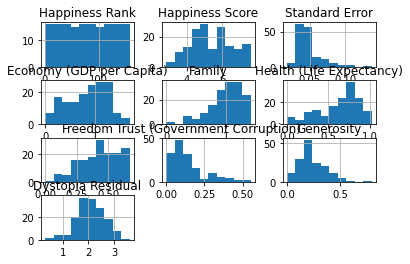

In [ ]:
hw15.hist()

EDA - ciscenje podataka da bi ih spojili u jedan set, sa varijablama, odn. features: Country, Rank, Score, GDP, Family, Health, Corruption.


In [ ]:
hw15.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [ ]:
hw15 = hw15.drop(columns={'Region','Standard Error','Dystopia Residual'})
hw15 = hw15.rename(columns ={'Happiness Rank' : 'Rank', 'Happiness Score' : 'Score','Economy (GDP per Capita)' : 'GDP', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)' : 'Corruption'})
hw15['Year'] = '2015'

In [ ]:
hw15.head()

,Country,Rank,Score,GDP,Family,Health,Freedom,Corruption,Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [ ]:
hw16.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [ ]:
hw16 = hw16.drop(columns = {'Region','Dystopia Residual', 'Lower Confidence Interval', 'Upper Confidence Interval'})
hw16 = hw16.rename(columns = {'Happiness Rank' : 'Rank', 'Happiness Score' : 'Score','Economy (GDP per Capita)' : 'GDP', 'Health (Life Expectancy)' : 'Health' ,'Trust (Government Corruption)': 'Corruption' })
hw16['Year'] = '2016'

In [ ]:
hw16.head()

,Country,Rank,Score,GDP,Family,Health,Freedom,Corruption,Generosity,Year
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2016
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2016
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2016


In [ ]:
hw17.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [ ]:
hw17 = hw17.drop(columns = {'Dystopia.Residual', 'Whisker.high', 'Whisker.low'})
hw17 = hw17.rename(columns = {'Happiness.Rank': 'Rank', 'Happiness.Score' : 'Score', 'Country or region' : 'Country', 'Freedom to make life choices' : 'Freedom', 'Health..Life.Expectancy.':'Health', 'Economy..GDP.per.Capita.' : 'GDP', 'Trust..Government.Corruption.': 'Corruption'})
hw17['Year'] = '2017'

In [ ]:
hw17.head()

,Country,Rank,Score,GDP,Family,Health,Freedom,Generosity,Corruption,Year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017


In [ ]:
hw18.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:
hw18.columns = ['Rank', 'Country', 'Score', 'GDP', 'Family', 'Health', 'Freedom', 'Generosity', 'Corruption']
hw18['Year'] = '2018'

In [ ]:
hw18.head()

,Rank,Country,Score,GDP,Family,Health,Freedom,Generosity,Corruption,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [ ]:
hw19.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
hw19.columns = ['Rank', 'Country', 'Score', 'GDP', 'Family', 'Health', 'Freedom', 'Generosity', 'Corruption']
hw19['Year'] = '2019'

In [ ]:
hw19.head()

,Rank,Country,Score,GDP,Family,Health,Freedom,Generosity,Corruption,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [ ]:
hw_all = pd.concat([hw15,hw16,hw17,hw18,hw19])

In [ ]:
hw_all.head()

,Country,Rank,Score,GDP,Family,Health,Freedom,Corruption,Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [ ]:
hw_all = hw_all.set_index('Country')

In [ ]:
hw_all.head()

,Rank,Score,GDP,Family,Health,Freedom,Corruption,Generosity,Year
Country,,,,,,,,,
Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


Prepoznavanje broja redova, oklona, tipova podataka i da li ima nedostajucih  i null vrednosti.

In [ ]:
hw_all.shape

(782, 9)

In [ ]:
hw_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, Switzerland to South Sudan
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        782 non-null    int64  
 1   Score       782 non-null    float64
 2   GDP         782 non-null    float64
 3   Family      782 non-null    float64
 4   Health      782 non-null    float64
 5   Freedom     782 non-null    float64
 6   Corruption  781 non-null    float64
 7   Generosity  782 non-null    float64
 8   Year        782 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 61.1+ KB


In [ ]:
hw_all.isna().sum()

Rank          0
Score         0
GDP           0
Family        0
Health        0
Freedom       0
Corruption    1
Generosity    0
Year          0
dtype: int64

In [ ]:
hw_all.isnull().values.any()

True

In [ ]:
hw_all['Corruption'] == True

Country
Switzerland                 False
Iceland                     False
Denmark                     False
Norway                      False
Canada                      False
                            ...  
Rwanda                      False
Tanzania                    False
Afghanistan                 False
Central African Republic    False
South Sudan                 False
Name: Corruption, Length: 782, dtype: bool

Posto je bila jedna nedostajuca vrednost u koloni CORRUPTION, onda smo to popunili sa srednjom vrednoscu, a potom proverili da li i dalje ima NA I NULL vrednosti


In [ ]:
hw_all['Corruption'] = hw_all['Corruption'].fillna(hw_all['Corruption'].median())

In [ ]:
hw_all.isnull().values.any()

False

In [ ]:
hw_all.isna().sum()

Rank          0
Score         0
GDP           0
Family        0
Health        0
Freedom       0
Corruption    0
Generosity    0
Year          0
dtype: int64

# VIZUELIZACIJA
odnosi izmedju atributa i uticaj jednih na druge.

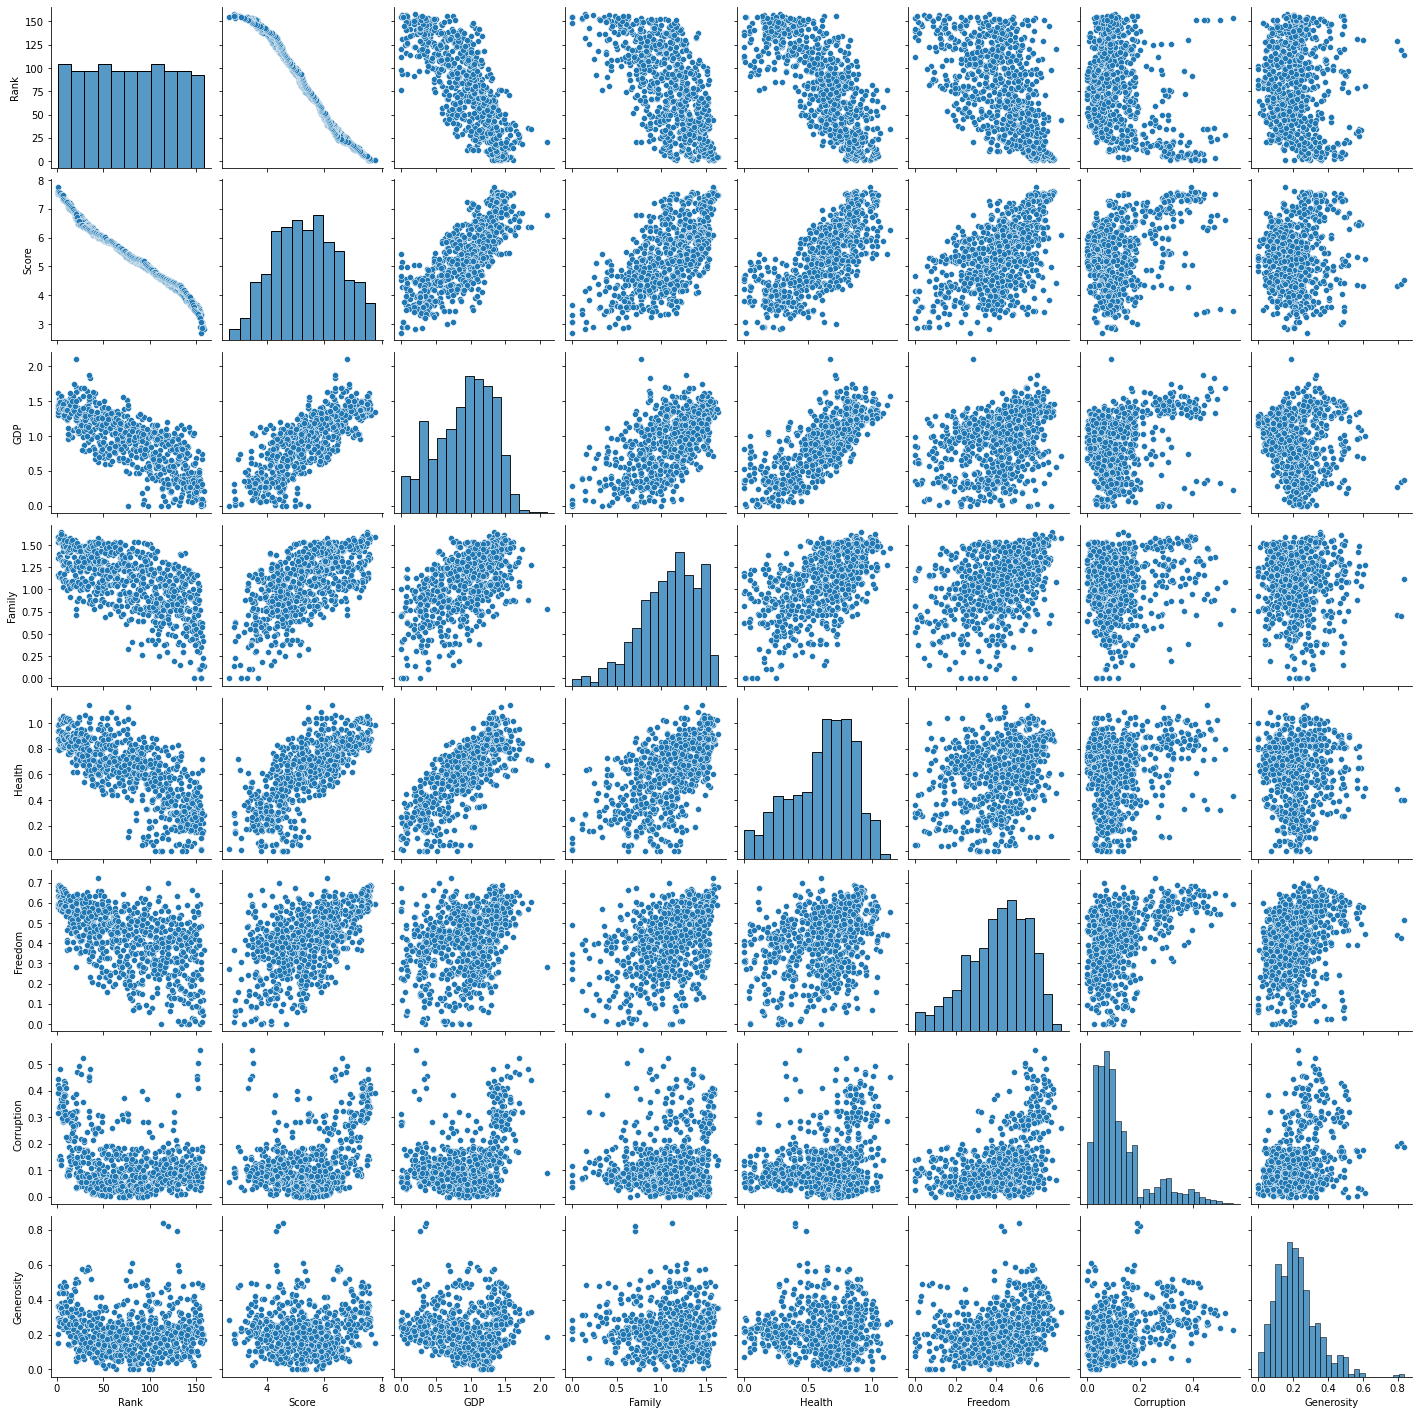

In [ ]:
sns.pairplot(hw_all)

VIZUELIZACIJA
- KORELACIJA IZMEDJU VARIJABLI

Korelacije izmedju varijabli

KRECE SE  OD -1 DO 1. Gde je veca povezanost, priblizna je 1. Zakljucujemo i koji su ficeri od najveceg znacaja.

In [ ]:
hw_all.corr()

,Rank,Score,GDP,Family,Health,Freedom,Corruption,Generosity
Rank,1.000000,-0.992066,-0.794791,-0.644842,-0.743655,-0.537942,-0.371810,-0.117713
Score,-0.992066,1.000000,0.789284,0.648799,0.742456,0.551258,0.397484,0.137578
GDP,-0.794791,0.789284,1.000000,0.585966,0.784338,0.340511,0.303427,-0.014560
Family,-0.644842,0.648799,0.585966,1.000000,0.572650,0.420361,0.126707,-0.037262
Health,-0.743655,0.742456,0.784338,0.572650,1.000000,0.340745,0.250390,0.010638
Freedom,-0.537942,0.551258,0.340511,0.420361,0.340745,1.000000,0.459705,0.290706
Corruption,-0.371810,0.397484,0.303427,0.126707,0.250390,0.459705,1.000000,0.318995
Generosity,-0.117713,0.137578,-0.014560,-0.037262,0.010638,0.290706,0.318995,1.000000


In [ ]:
hwc =hw_all.corr()

Text(0.5, 1.0, 'Correlation plot')

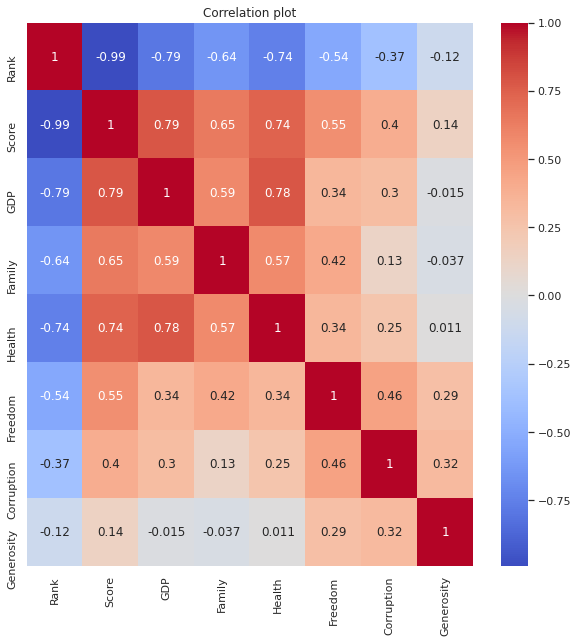

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(hwc, annot=True, cmap='coolwarm')
plt.title('Correlation plot')


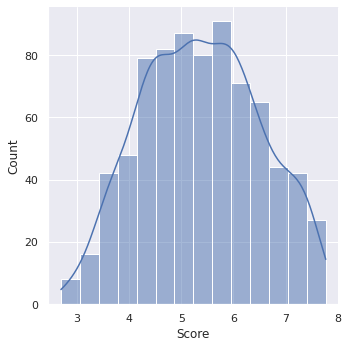

In [ ]:
sns.displot(hw_all['Score'], kde=True)

distribucija target kolone - score, ono sto zelimo predvideti***


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8bb9c8450>,
      dtype=object)

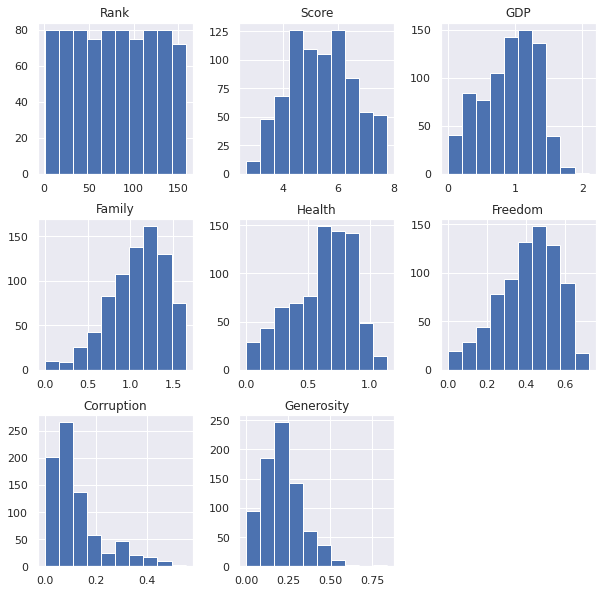

In [ ]:
hw_all.hist()

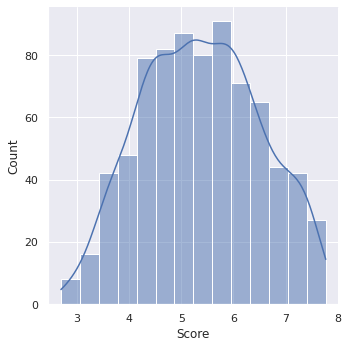

In [ ]:
sns.displot(hw_all['Score'], kde=True)

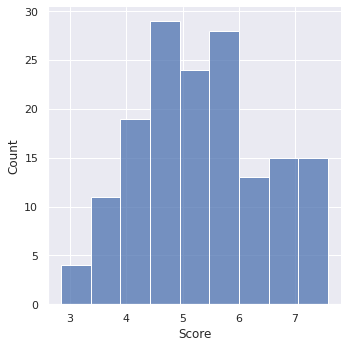

In [ ]:
sns.displot(hw15['Score'])

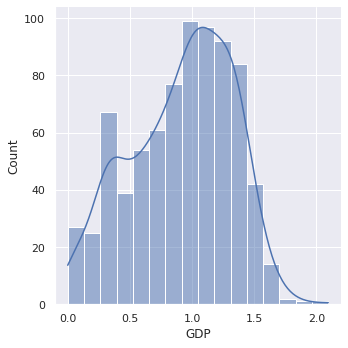

In [ ]:
sns.displot(hw_all['GDP'], kde=True)

*univariate* distribution

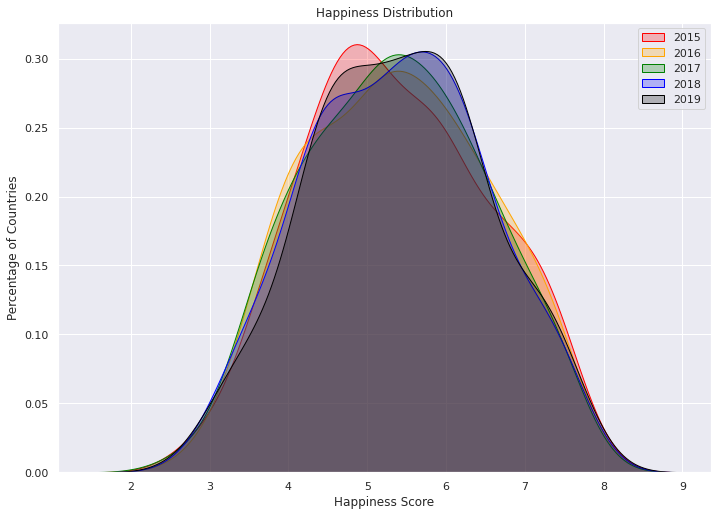

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title("Happiness Distribution")
plt.ylabel("Percentage of Countries")
plt.xlabel("Happiness Score")


sns.kdeplot(data = hw15['Score'], shade = True, color = 'red', label = '2015')
sns.kdeplot(data = hw16['Score'], shade = True, color = 'orange', label = '2016')
sns.kdeplot(data = hw17['Score'], shade = True, color = 'green', label = '2017')
sns.kdeplot(data = hw18['Score'], shade = True, color = 'blue', label = '2018')
sns.kdeplot(data = hw19['Score'], shade = True, color = 'black', label = '2019')
plt.legend()

radi se o normalnoj distribuciji, KERNEL DENCITY ESTIMATION - KDE, vidimo na hist

DISTRIBUCIJA - HAPPINESS

Text(0.5, 0, 'Year')

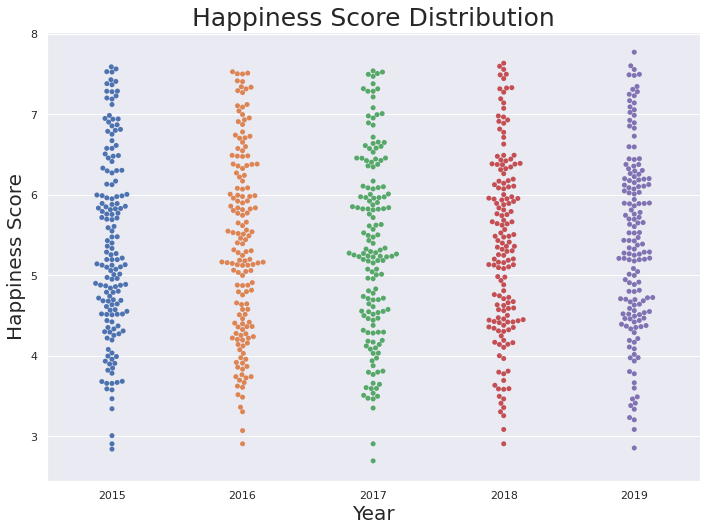

In [ ]:
plt.title("Happiness Score Distribution", fontsize = 25)
sns.swarmplot(x=hw_all['Year'], y=hw_all['Score'])
plt.ylabel('Happiness Score', fontsize=20)
plt.xlabel("Year", fontsize = 20)

Text(0.5, 0, 'Year')

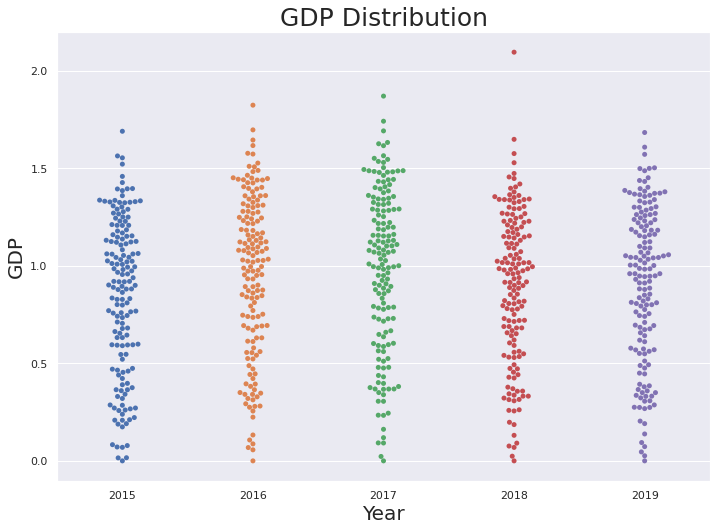

In [ ]:
plt.title("GDP Distribution", fontsize = 25)
sns.swarmplot(x=hw_all['Year'], y=hw_all['GDP'])
plt.ylabel('GDP', fontsize=20)
plt.xlabel("Year", fontsize = 20)

#RANDOM FOREST I SUPPORT VECTOR MACHINE
predstavljaju modele SUPERVISED masinskog ucenja na osnovu klasifikacije. Kako je nas set ima numericki izlaz i kontunalnu vrednost, potrebno ga je uskladiti na nacin na koji bi mogli da primenimo imenovane modele. Proveravamo kolone i unosimo jos jedan atribut - 'HAPPY' zemlja (Yes/No), na osnovu Score podataka. 

In [ ]:
hw_all.columns

Index(['Rank', 'Score', 'GDP', 'Family', 'Health', 'Freedom', 'Corruption',
       'Generosity', 'Year'],
      dtype='object')

HAPPY vs UNHAPPY COUNTRIES - KLASIFIKACIJA NA OSNOVU SCORE


In [ ]:
happy = []
for i in hw_all.Score:
   if (i > 5):
     happy.append('Yes')

   else:
     happy.append('No')

hw_all['Happy']=happy


In [ ]:
hw_all.head()

,Rank,Score,GDP,Family,Health,Freedom,Corruption,Generosity,Year,Happy
Country,,,,,,,,,,
Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,Yes
Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,Yes
Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,Yes
Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,Yes
Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,Yes


In [ ]:
hw_all['Happy'].value_counts()

Yes    484
No     298
Name: Happy, dtype: int64

RANDOM FOREST AND SUPPORT VECTOR MACHINE KLASIFIKATOR

Da bi primenili klasifikator RF I SVM, potrebno je da kategoricke vrednosti pretvorimo u numericke

In [ ]:
hw_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, Switzerland to South Sudan
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        782 non-null    int64  
 1   Score       782 non-null    float64
 2   GDP         782 non-null    float64
 3   Family      782 non-null    float64
 4   Health      782 non-null    float64
 5   Freedom     782 non-null    float64
 6   Corruption  782 non-null    float64
 7   Generosity  782 non-null    float64
 8   Year        782 non-null    object 
 9   Happy       782 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 87.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
for column in hw_all.columns:
   if hw_all[column].dtypes==np.number:
       continue
   hw_all[column]= LabelEncoder().fit_transform(hw_all[column])

hw_all.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  


,Rank,Score,GDP,Family,Health,Freedom,Corruption,Generosity,Year,Happy
Country,,,,,,,,,,
Switzerland,0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,0,1
Iceland,1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,0,1
Denmark,2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,0,1
Norway,3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,0,1
Canada,4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,0,1


In [ ]:
hw_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, Switzerland to South Sudan
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        782 non-null    int64  
 1   Score       782 non-null    float64
 2   GDP         782 non-null    float64
 3   Family      782 non-null    float64
 4   Health      782 non-null    float64
 5   Freedom     782 non-null    float64
 6   Corruption  782 non-null    float64
 7   Generosity  782 non-null    float64
 8   Year        782 non-null    int64  
 9   Happy       782 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 87.2+ KB


In [ ]:
hw_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, Switzerland to South Sudan
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        782 non-null    int64  
 1   Score       782 non-null    float64
 2   GDP         782 non-null    float64
 3   Family      782 non-null    float64
 4   Health      782 non-null    float64
 5   Freedom     782 non-null    float64
 6   Corruption  782 non-null    float64
 7   Generosity  782 non-null    float64
 8   Year        782 non-null    int64  
 9   Happy       782 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 87.2+ KB


In [ ]:
X = hw_all.drop(columns={'Happy','Rank','Year','Score'}, axis=1)
Y = hw_all['Happy']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state = 0)

In [ ]:
hw_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, Switzerland to South Sudan
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        782 non-null    int64  
 1   Score       782 non-null    float64
 2   GDP         782 non-null    float64
 3   Family      782 non-null    float64
 4   Health      782 non-null    float64
 5   Freedom     782 non-null    float64
 6   Corruption  782 non-null    float64
 7   Generosity  782 non-null    float64
 8   Year        782 non-null    int64  
 9   Happy       782 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 87.2+ KB


In [ ]:
hw_all['Happy'].head()

Country
Switzerland    1
Iceland        1
Denmark        1
Norway         1
Canada         1
Name: Happy, dtype: int64

In [ ]:
#evaluacija
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

rforest = RandomForestClassifier()

rforest.fit(X_train, Y_train)

y_pred = rforest.predict(X_test)
acc_rforest = accuracy_score(Y_test, y_pred)

print("Accuracy: {}".format(acc_rforest))
print()
print(classification_report(Y_test,y_pred))
cnf_matrix = metrics.confusion_matrix(Y_test,y_pred)
print(cnf_matrix)





Accuracy: 0.8928571428571429

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        69
           1       0.92      0.91      0.92       127

    accuracy                           0.89       196
   macro avg       0.88      0.88      0.88       196
weighted avg       0.89      0.89      0.89       196

[[ 59  10]
 [ 11 116]]


In [ ]:
from sklearn.svm import SVC

In [ ]:
#Support Vector Machine
from sklearn.svm import SVC
svc_cl = SVC()
svc_cl.fit(X_train, Y_train)
y_pred = svc_cl.predict(X_test)
acc_svm = accuracy_score(Y_test, y_pred)
print("Accuracy: {}".format(acc_svm))
print()
print(classification_report(Y_test,y_pred))
cnf_matrix = metrics.confusion_matrix(Y_test,y_pred)
print(cnf_matrix)

Accuracy: 0.9030612244897959

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        69
           1       0.91      0.94      0.93       127

    accuracy                           0.90       196
   macro avg       0.90      0.89      0.89       196
weighted avg       0.90      0.90      0.90       196

[[ 57  12]
 [  7 120]]


EVALUATION METRICS FOR CLASSIFICATION PROBLEM
Merenje rezultata za klasifikacioni problem je classification report.: koliko je predikcija tacno, a koliko ne. Tacnije: true positive (TP), true negative(TN), false positive (FP) i false negative (FN) (confusion matrix).

1. Accuracy - jedna od metrika za evaluaciju klasifikacionog modela. Predstavlja procenat tacnosti modela. Odnosno: broj tacnih predikcija/ukupan broj predikcija.
2. Precision - tacnost pozitivnih predikcija. TP/(TP+FP)
3. Recall - suprotno od precision, deo pozitivnih instanci koje su uspesno identifikovane. TP/(TP+FN)
4. F1-score - ponderisana harmonijska sredina precision i recall, gde je nabolji rezultat 1, a najgori 0. Formula: F1 Score = 2*(Recall*Precision)/(Recall+Precision)



#ZAKLJUCAK

Na osnovu Galupovih godisnjih izvestaja, mozemo zakljuciti da na srecnije nacije uticu najvise GDP, Family i Health. Prema tim merilima srece, nacionalne vlade treba da ulazu u ekonomski razvoj zemlje da bi narod ziveo srecnije.